In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Data Exploration and Cleaning

In [4]:
# import data
df = pd.read_csv('yield_df.csv')

In [6]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [8]:
# drop unanamed column
df.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [12]:
# check for null values
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [16]:
# check for duplicate rows
df.duplicated().sum()

2310

In [18]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [22]:
# dimension of dataframe
df.shape

(25932, 7)

#### Statistical Summary

In [25]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [29]:
df.corr(numeric_only=True)

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


#### Check Number of Unique Values

In [32]:
df.nunique()

Area                               101
Item                                10
Year                                23
hg/ha_yield                      11514
average_rain_fall_mm_per_year      100
pesticides_tonnes                 1673
avg_temp                          1831
dtype: int64

In [37]:
df['Item'].value_counts()

Item
Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: count, dtype: int64

## Data Visualization

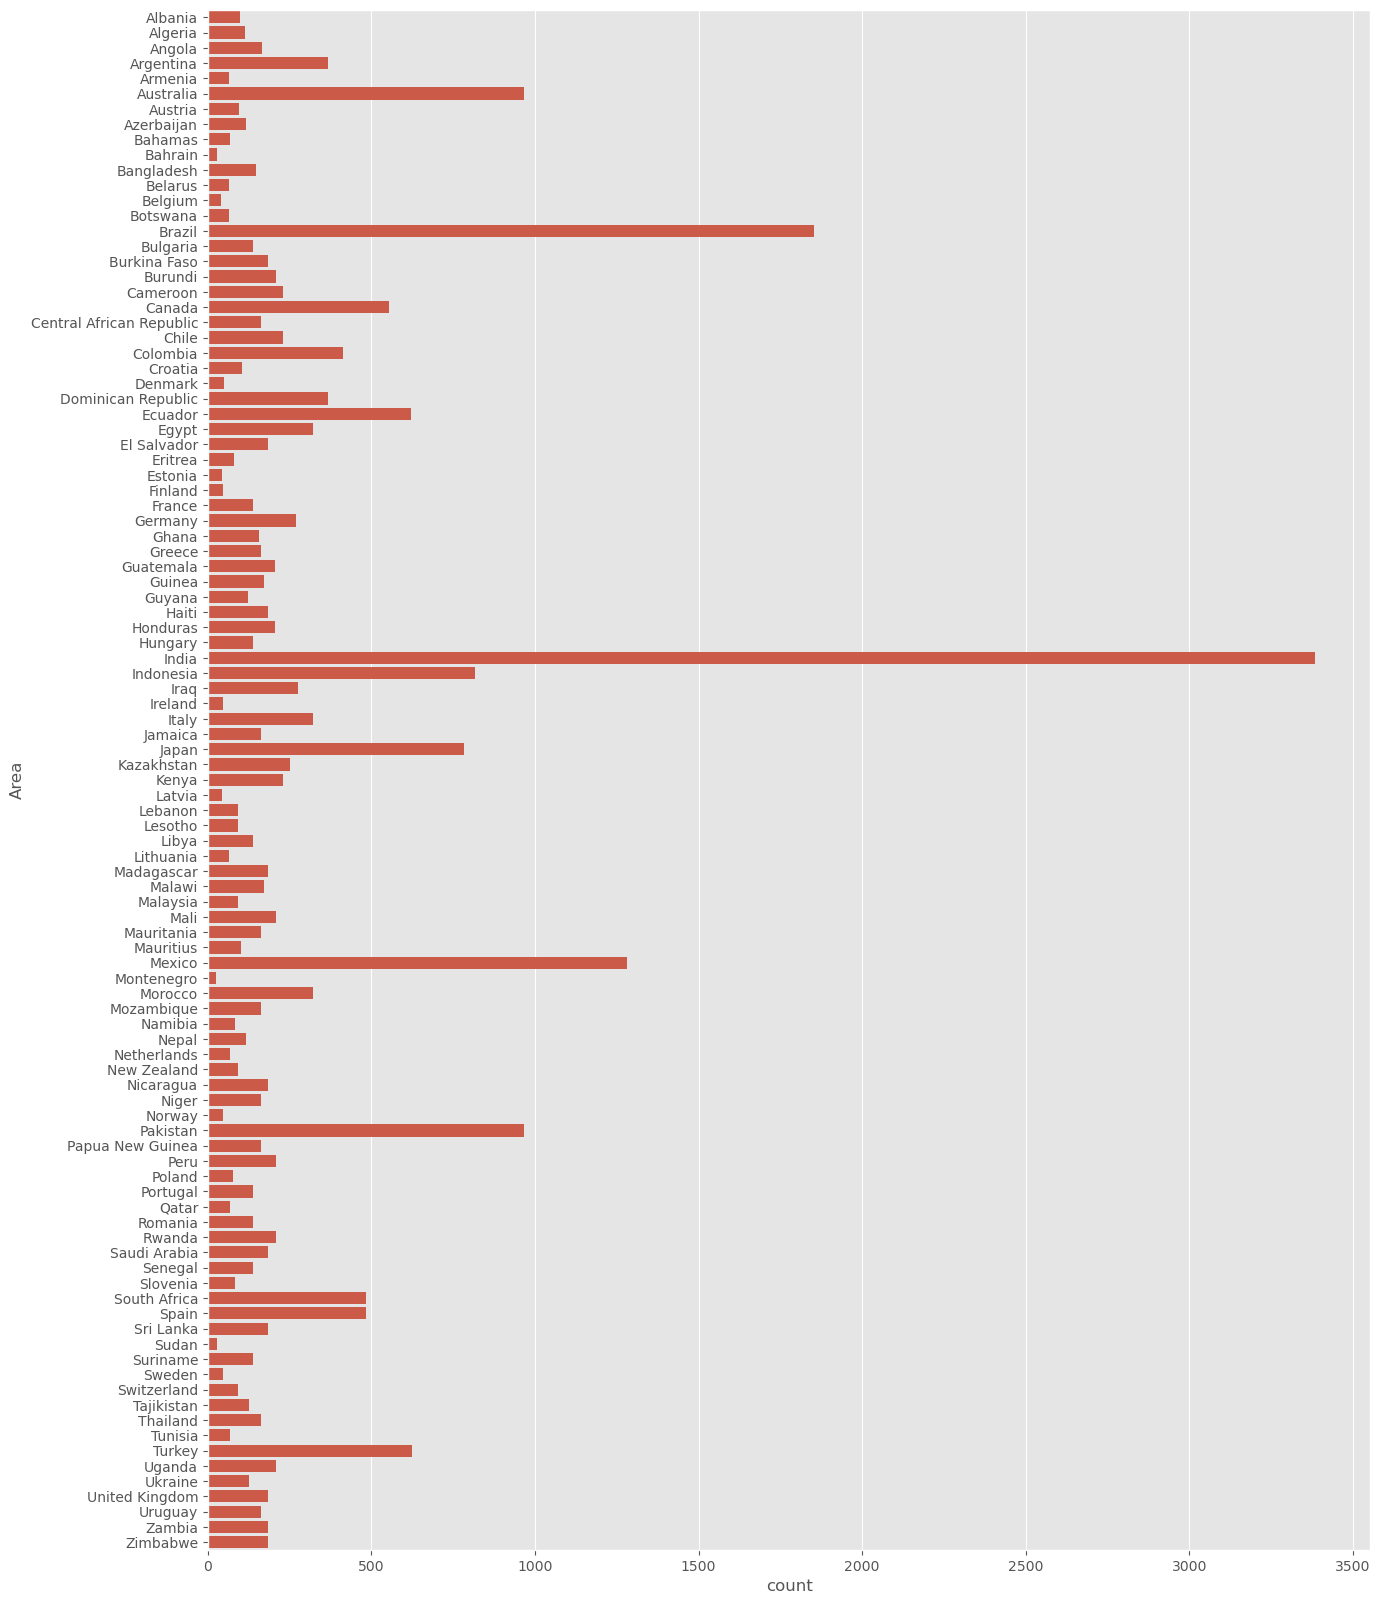

In [40]:
plt.figure(figsize=(15,20))
sns.countplot(y = 'Area',data=df)
plt.show()

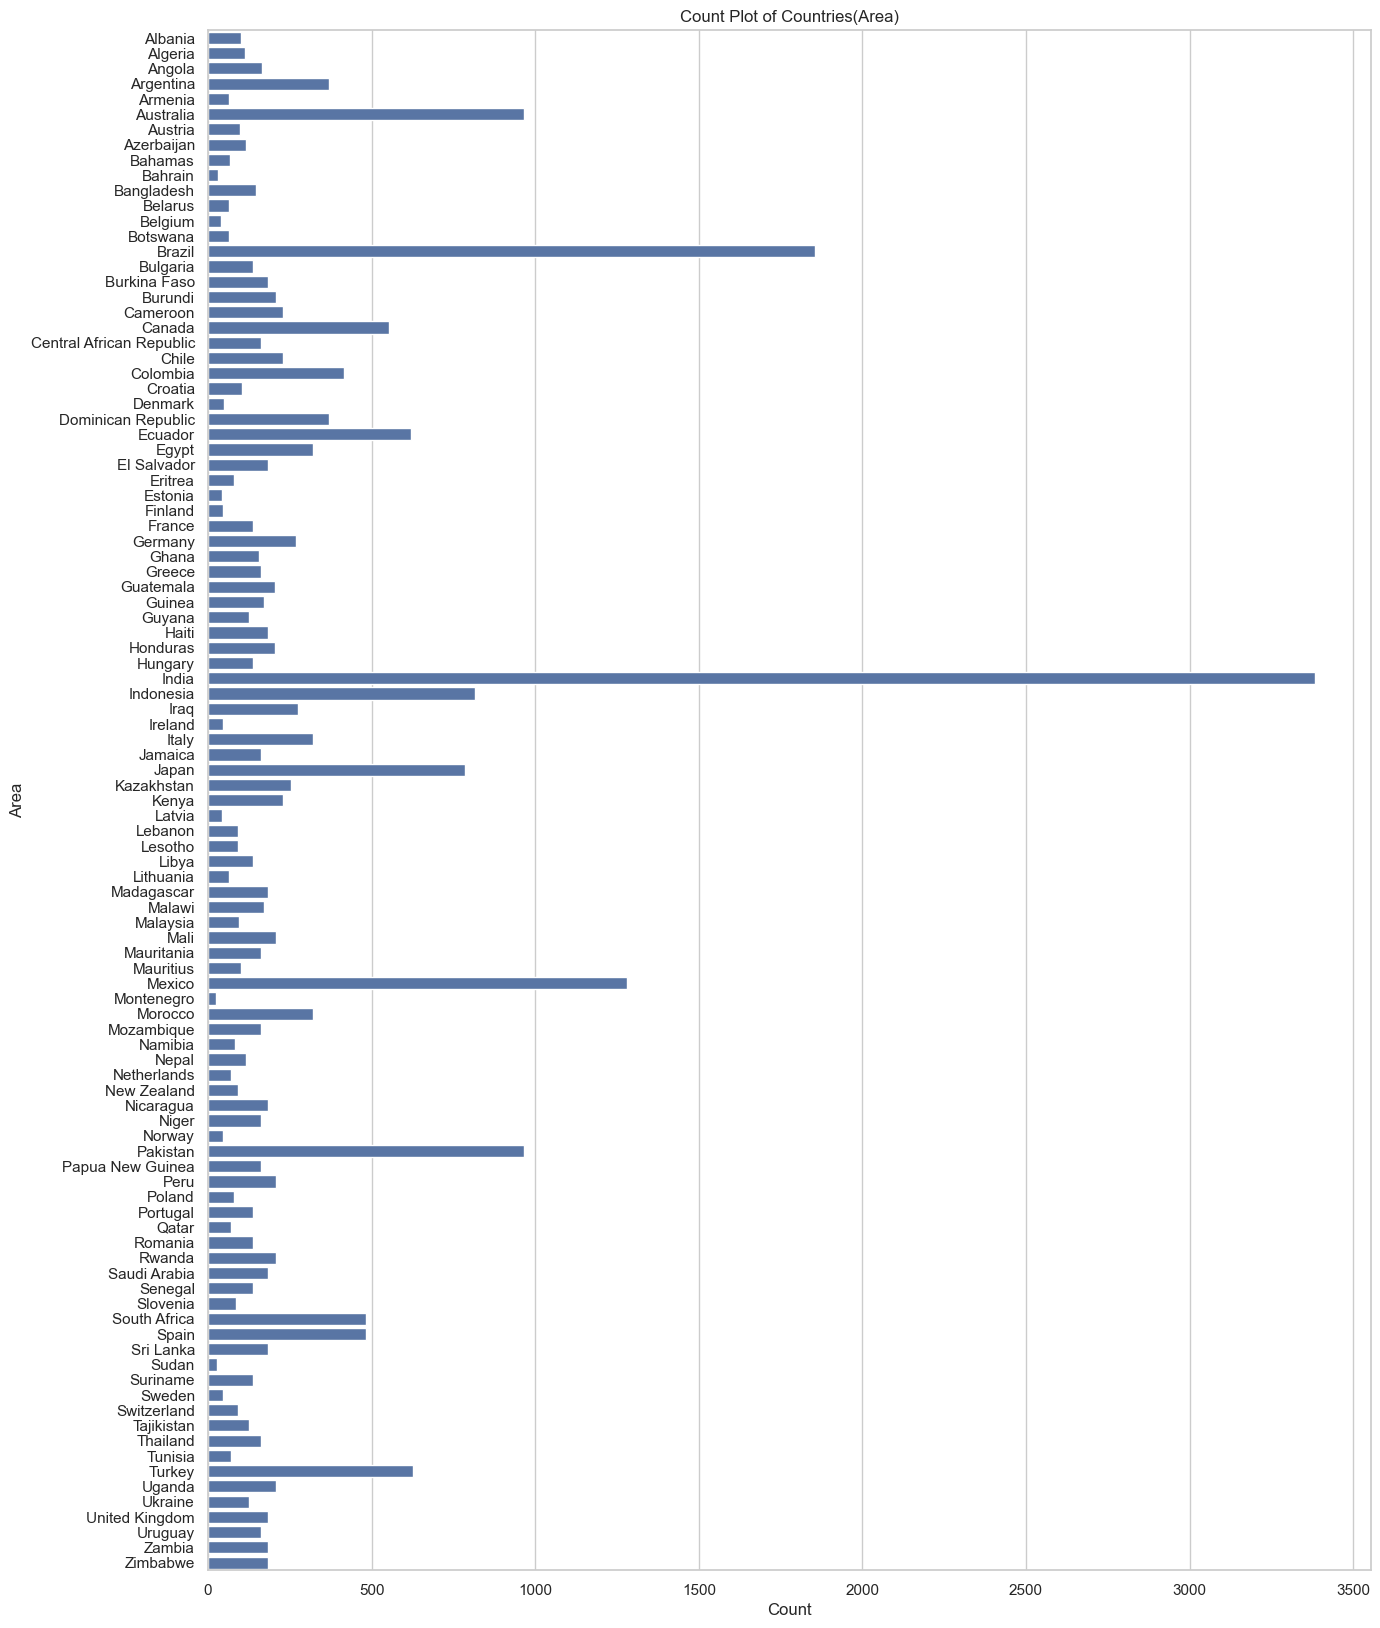

In [50]:
# Create a count plot
plt.figure(figsize=(15, 20))
ax = sns.countplot(y='Area', data=df)
ax.set(title="Count Plot of Countries(Area)", xlabel="Count", ylabel="Area")

# Show the plot
plt.show()

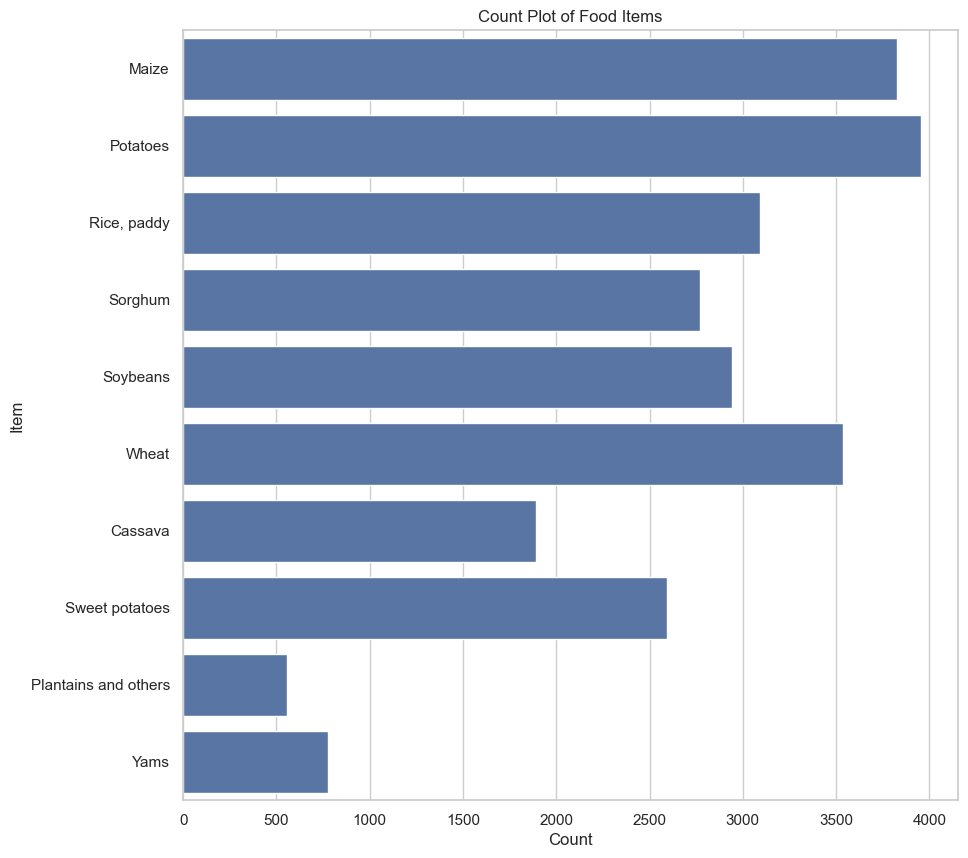

In [54]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(y='Item', data=df)
ax.set(title="Count Plot of Food Items", xlabel="Count", ylabel="Item")

# Show the plot
plt.show()

In [56]:
# yield per country
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [58]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

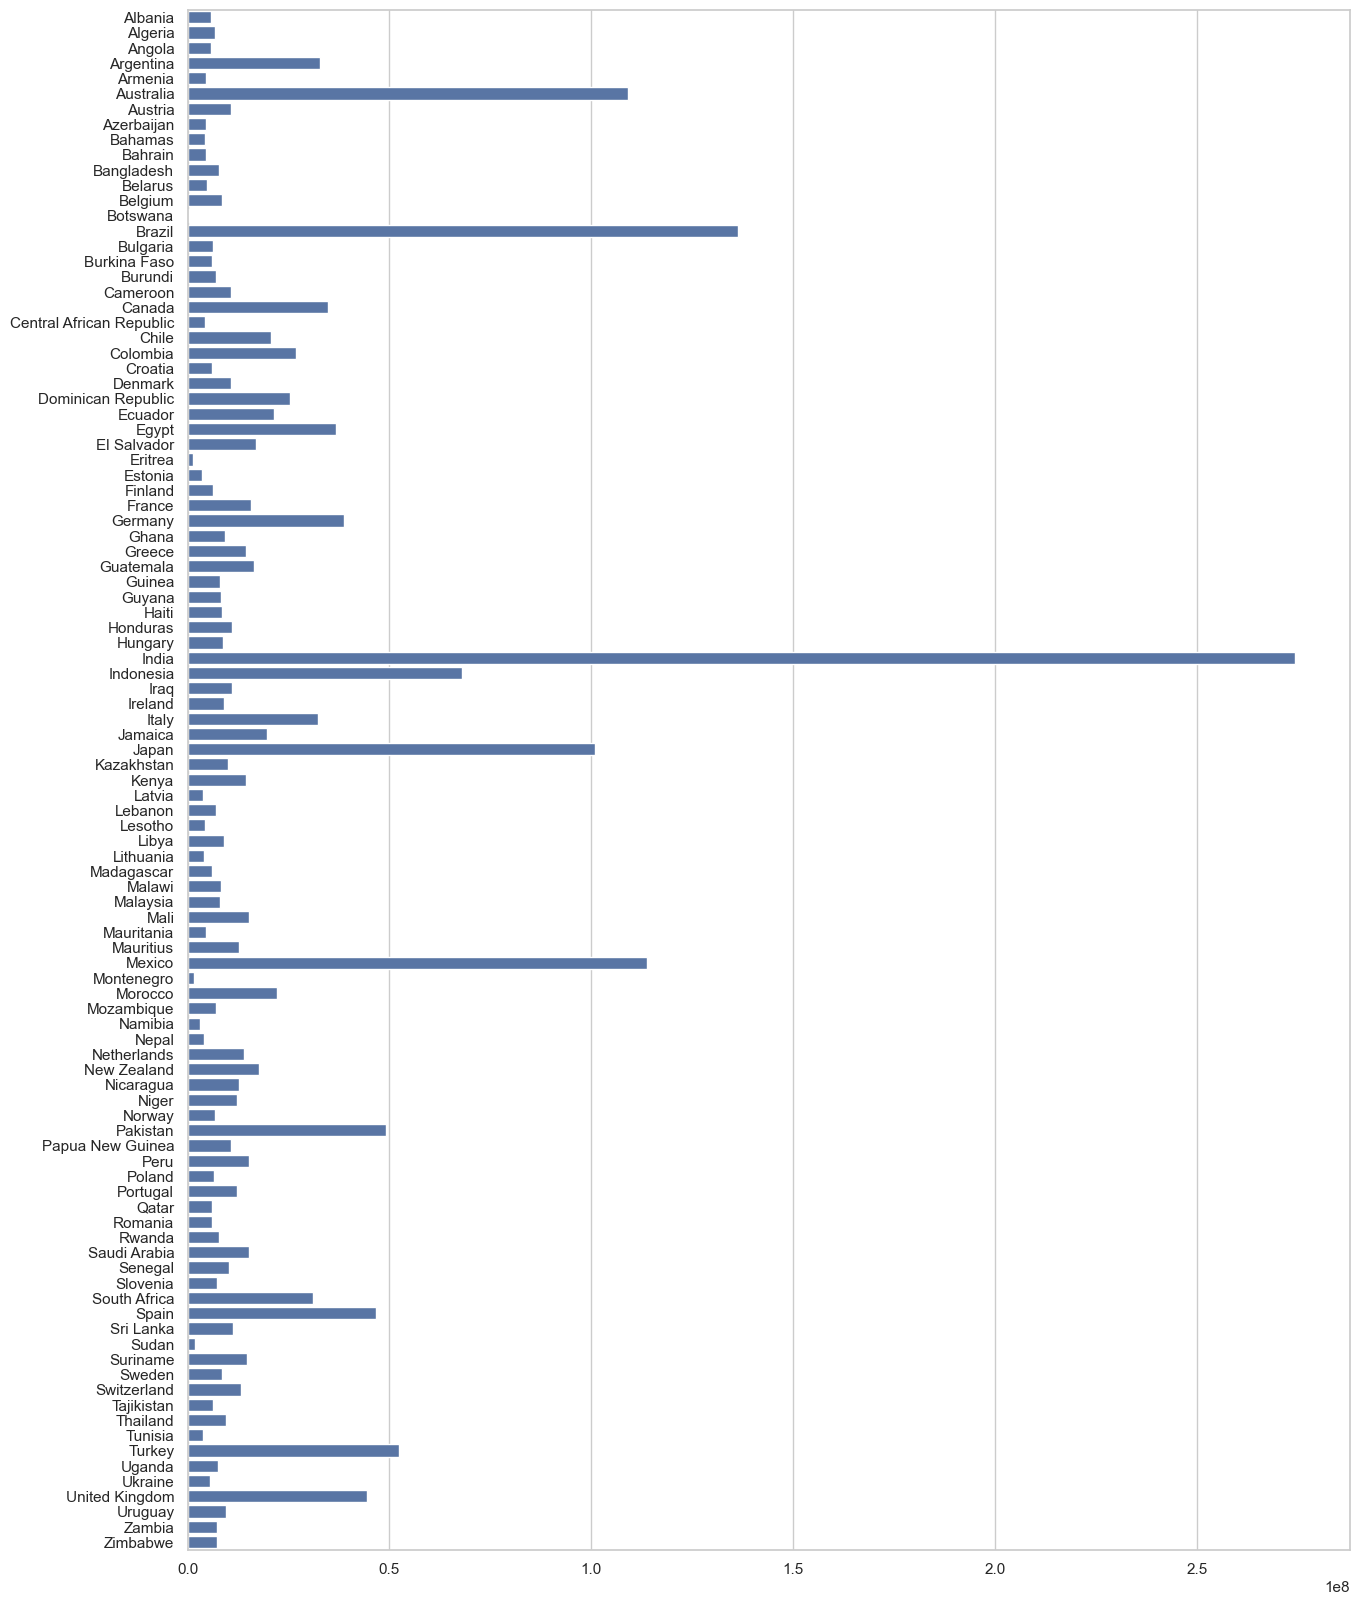

In [60]:
plt.figure(figsize=(15,20))
sns.barplot(y = country, x = yield_per_country)
plt.show()

In [62]:
# yield per crop
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

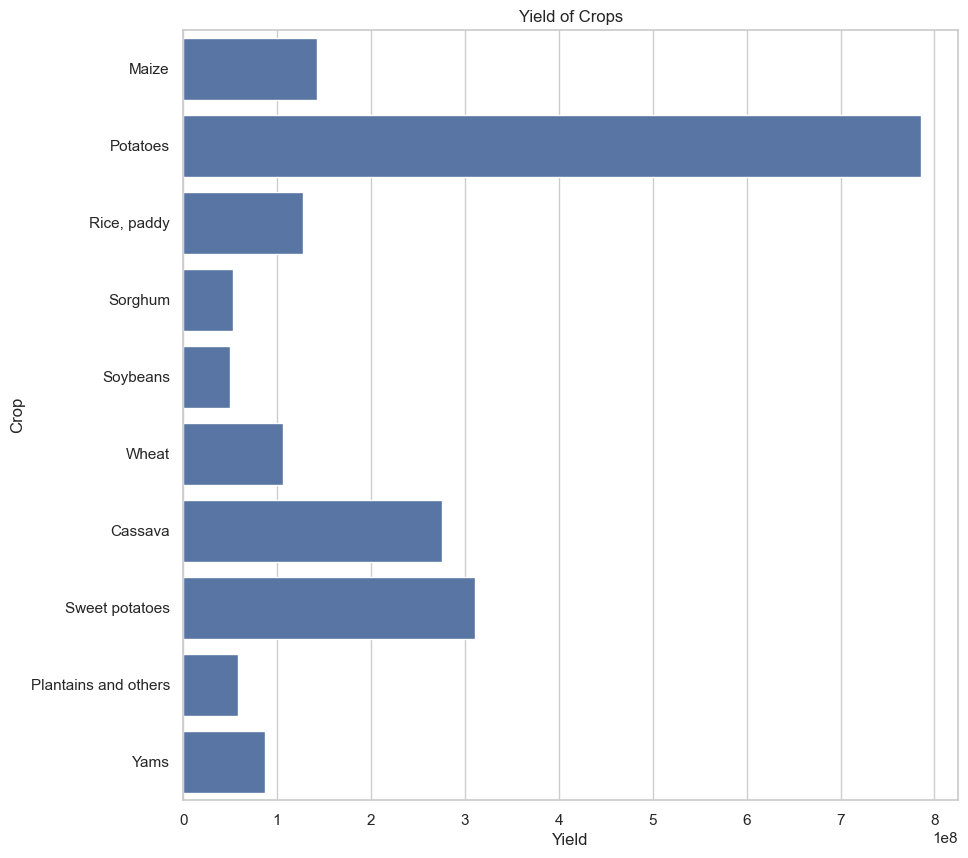

In [64]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(y = crops, x = yield_per_crop)
ax.set(title="Yield of Crops", xlabel="Yield", ylabel="Crop")

# Show the plot
plt.show()

## Machine Learning

In [69]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


Scale and Transform Data

In [72]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [74]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']
df = df[col]
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [76]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [78]:
X.shape, y.shape

((25932, 6), (25932,))

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [84]:
ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4,5])
    ], 
    remainder = 'passthrough'
) 

In [86]:
X_train_tf = preprocesser.fit_transform(X_train)
X_test_tf  = preprocesser.fit_transform(X_test)

In [100]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [102]:

# Dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

# List to hold model performance data
performance_metrics = []

# Loop through models and calculate metrics
for name, md in models.items():
    md.fit(X_train_tf, y_train)
    y_pred = md.predict(X_test_tf)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append model performance data to the list
    performance_metrics.append({
        'Model': name,
        'MAE': mae,
        'R²': r2
    })

# Convert the list of dictionaries into a DataFrame
performance_df = pd.DataFrame(performance_metrics)

performance_df

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505228



,Model,MAE,R²
0,Linear Regression,29897.285053,0.747273
1,Lasso,29883.830652,0.747294
2,Ridge,29851.465447,0.747265
3,Decision Tree,5507.057451,0.970124
4,KNN,4693.985772,0.984519


In [103]:
# Sort the DataFrame by R² in descending order
performance_df.sort_values(by='R²', ascending=False)

,Model,MAE,R²
4,KNN,4693.985772,0.984519
3,Decision Tree,5507.057451,0.970124
1,Lasso,29883.830652,0.747294
0,Linear Regression,29897.285053,0.747273
2,Ridge,29851.465447,0.747265


In [117]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_tf,y_train)
dt_model.predict(X_test_tf)

array([35286., 22814., 19295., ..., 11488., 34879., 77391.])

Create prediction function

In [119]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocesser.transform(features)
    predicted_yield = dt_model.predict(transform_features).reshape(-1,1)
    return predicted_yield[0][0]

In [121]:
prediction(1990,1485.0,121.0,16.37,'Albania','Maize')

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



36613.0

In [125]:
# save model
import pickle
pickle.dump(dt_model, open("dt_model.pkl","wb"))
pickle.dump(preprocesser, open("preprocesser.pkl","wb"))